In [1]:
import tensorflow as tf
import numpy as np
import torch
import torch.nn as nn
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Embedding, LSTM
from keras.callbacks import LearningRateScheduler

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
import numpy as np
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import pearsonr 
from sklearn.metrics import r2_score


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#ShipDensity, UV, Vx, Vy, CF
#NO2

df = pd.read_csv("/content/drive/MyDrive/data.csv")
df

,Unnamed: 0,ShipDensity_GoM,ShipDensity_SD,ShipDensity_LA,CloudFraction_GoM,NO2_GoM,CloudFraction_SD,NO2_SD,CloudFraction_LA,NO2_LA,Vx_GoM,Vy_GoM,Temp_GoM,UV_GoM,Vx_SD,Vy_SD,Temp_SD,UV_SD,Vx_LA,Vy_LA,Temp_LA,UV_LA
0,0,2714,1003,2714,0.466485,0.000016,0.577889,0.000007,0.523178,0.000010,3.443189,-0.880976,294.836171,151679.5911,4.847551,-1.837229,293.190709,134315.1706,3.104485,-4.414107,288.734746,104686.78520
1,1,21,801,21,0.185305,0.000023,0.605856,0.000008,0.308915,0.000007,1.058457,0.855712,294.619837,157362.3789,1.673513,0.819050,292.946177,140694.6654,3.146796,1.183646,289.782862,104370.73440
2,2,3290,1471,3290,0.116570,0.000018,0.916302,0.000013,0.653192,0.000013,3.761740,0.469444,294.347697,145379.5365,5.478863,-0.190575,292.907929,124002.5065,4.537908,-0.784662,289.442891,98398.08594
3,3,1280,264,1280,0.046271,0.000018,0.121102,0.000007,0.415542,0.000011,1.834959,1.461042,294.985443,158156.8685,2.675372,2.495277,293.594584,132885.9596,4.645687,4.459433,290.500682,95001.85677
4,4,1689,224,1689,0.149224,0.000021,0.484808,0.000010,0.596711,0.000010,4.131842,3.227810,295.145574,132557.6823,5.656788,3.185375,294.022120,122792.4362,8.132152,3.652057,290.280014,105785.10290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,205,3651,4704,3651,0.018858,0.000004,0.415132,0.000005,0.470309,0.000013,-3.334264,-0.334922,297.727997,289187.8620,-1.892568,0.102167,297.685348,277825.7057,0.696557,0.658730,296.987956,278598.07550
206,206,3103,5194,3103,0.123596,0.000005,0.559488,0.000005,0.585012,0.000010,-1.860628,-1.628921,297.085515,274291.9922,-1.106564,-0.704727,297.616704,268684.7396,0.950624,-0.836865,297.034933,250787.73960
207,207,2247,3188,2247,0.013869,0.000009,0.751532,0.000003,0.448696,0.000011,-3.095499,-0.909905,297.525396,284252.0208,-2.321276,-0.125268,297.704631,273484.2943,-0.588108,0.248375,296.727305,260552.15100
208,208,3058,3140,3058,0.054175,0.000006,0.428532,0.000007,0.179921,0.000009,-4.087963,-0.078706,297.627538,277319.6198,-3.370091,0.872350,297.677165,272675.3099,-1.782052,1.560410,296.850164,271863.82550


In [3]:
input = []

for i in range(len(df)):
  val = []
  val.append(df['ShipDensity_SD'][i])
  val.append(df['UV_SD'][i])
  val.append(df['Vx_SD'][i])
  val.append(df['Vy_SD'][i])
  val.append(df['CloudFraction_SD'][i])
  val.append(df['NO2_SD'][i])
  input.append(val)



inputTest = []

for i in range(len(df)):
  val = []
  val.append(df['ShipDensity_LA'][i])
  val.append(df['UV_LA'][i])
  val.append(df['Vx_LA'][i])
  val.append(df['Vy_LA'][i])
  val.append(df['CloudFraction_LA'][i])
  val.append(df['NO2_LA'][i])
  inputTest.append(val)


input = np.array(input)
inputTest = np.array(inputTest)

In [4]:
scaler = StandardScaler()
scaler.fit(input)
scaledtrain = scaler.transform(input)

In [5]:
inputs = keras.Input(shape = (5,))
x = layers.Dense(18, activation='tanh')(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
dense (Dense)                (None, 18)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 19        
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


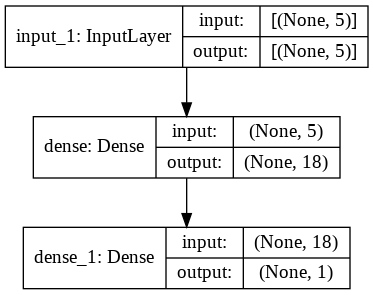

In [6]:
keras.utils.plot_model(model, show_shapes=True)

In [7]:
historynn = model.fit(scaledtrain[:,:5], scaledtrain[:,5:], epochs = 100, validation_split=0.1, verbose=1)

Epoch 1/100
6/6 [==============================] - 1s 42ms/step - loss: 1.2871 - mae: 0.8646 - val_loss: 2.1428 - val_mae: 1.2966
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 1.2292 - mae: 0.8418 - val_loss: 2.0362 - val_mae: 1.2563
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 1.1617 - mae: 0.8142 - val_loss: 1.9442 - val_mae: 1.2206
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 1.1090 - mae: 0.7924 - val_loss: 1.8596 - val_mae: 1.1878
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0668 - mae: 0.7765 - val_loss: 1.7804 - val_mae: 1.1572
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 1.0291 - mae: 0.7623 - val_loss: 1.6965 - val_mae: 1.1238
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.9943 - mae: 0.7514 - val_loss: 1.6294 - val_mae: 1.0961
Epoch 8/100
6/6 [==============================] - 0s 7ms/step - loss: 0.9664 - mae: 0.7414 - va

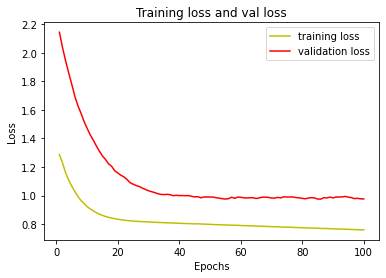

In [8]:
lossnn = historynn.history['loss']
val_lossnn = historynn.history['val_loss']
epochs = range(1, len(lossnn) + 1)
plt.plot(epochs, lossnn, 'y', label='training loss')
plt.plot(epochs, val_lossnn, 'r', label='validation loss')
plt.title('Training loss and val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

In [9]:
scaler2 = StandardScaler()
scaler2.fit(inputTest)
scaledtest = scaler2.transform(inputTest)

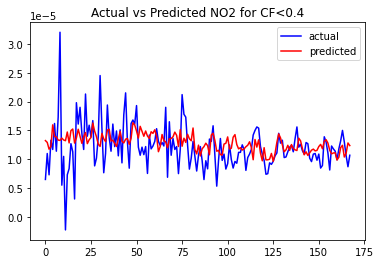

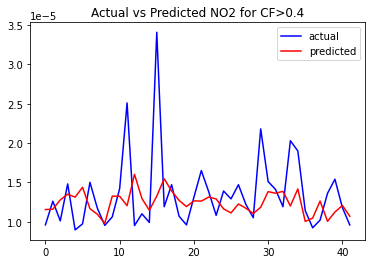

In [19]:
inp = []
prediction = []
for i in range(len(inputTest)):
  if(inputTest[i,4])<=0.5:
    forecast = model.predict(scaledtest[i:i+1,:5])
    forecast = np.repeat(forecast, 6, axis = -1)
    predict = scaler2.inverse_transform(forecast)
    inp.append(inputTest[i,5])
    prediction.append(predict[:,5])

plt.plot(inp,  'b', label='actual')
plt.plot(prediction, 'r', label='predicted')
plt.title('Actual vs Predicted NO2 for CF<0.4')
plt.legend()
plt.show()

inp = []
prediction = []
for i in range(len(inputTest)):
  if(inputTest[i,4])>0.5:
    forecast = model.predict(scaledtest[i:i+1,:5])
    forecast = np.repeat(forecast, 6, axis = -1)
    predict = scaler2.inverse_transform(forecast)
    inp.append(inputTest[i,5])
    prediction.append(predict[:,5])

plt.plot(inp,  'b', label='actual')
plt.plot(prediction, 'r', label='predicted')
plt.title('Actual vs Predicted NO2 for CF>0.4')
plt.legend()
plt.show()

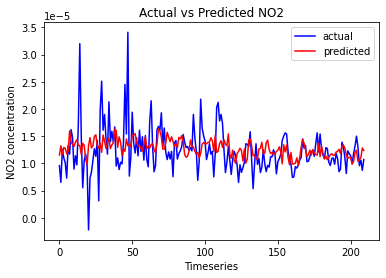

In [23]:
forecast = model.predict(scaledtest[:,:5])
forecast = np.repeat(forecast, 6, axis = -1)
predict = scaler2.inverse_transform(forecast)

plt.plot(inputTest[:, 5],  'b', label='actual')
plt.plot(predict[:, 5], 'r', label='predicted')
plt.title('Actual vs Predicted NO2')
plt.xlabel('Timeseries')
plt.ylabel('NO2 concentration')
plt.legend()
plt.show()